In [ ]:
# Read dataset
from sklearn.datasets import load_iris

iris = load_iris()

# convert ke pandas dataframe
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [2]:
# EDA

print(f'features name : \n{iris.feature_names}\n')
print(f'target name : \n{iris.target_names}')
print(f'\n5 data teratas : \n{df.head()}')
print(f'\nCek missing values \n{df.isnull().sum()}')



features name : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target name : 
['setosa' 'versicolor' 'virginica']

5 data teratas : 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Cek missing values 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Preprocessing data

#### Split data

In [ ]:
from sklearn.model_selection import train_test_split

# pisah data dan data target
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Standarisasi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Latih model ML

In [11]:
# di rubah untuk mencoba k berapa yang terbaik
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# training model
knn = KNeighborsClassifier(n_neighbors=10)

# fitting model
knn.fit(X_train_scaled, y_train)

# prediksi model
y_pred = knn.predict(X_test_scaled)

# Evaluasi Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acc = accuracy_score(y_test, y_pred)
print(f'accuracy : {acc:.4f}')

crp = classification_report(y_test, y_pred)
print("Akurasi Testing dengan Best Parameters:\n", crp)

accuracy : 1.0000
Akurasi Testing dengan Best Parameters:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)

# Print hasil rata-rata cross-validation
print(f'Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}')
print(f'Cross-Validation Scores: {cv_scores}')


Cross-Validation Mean Accuracy: 0.9417
Cross-Validation Scores: [0.91666667 1.         0.91666667 1.         0.91666667 0.83333333
 1.         1.         1.         0.83333333]


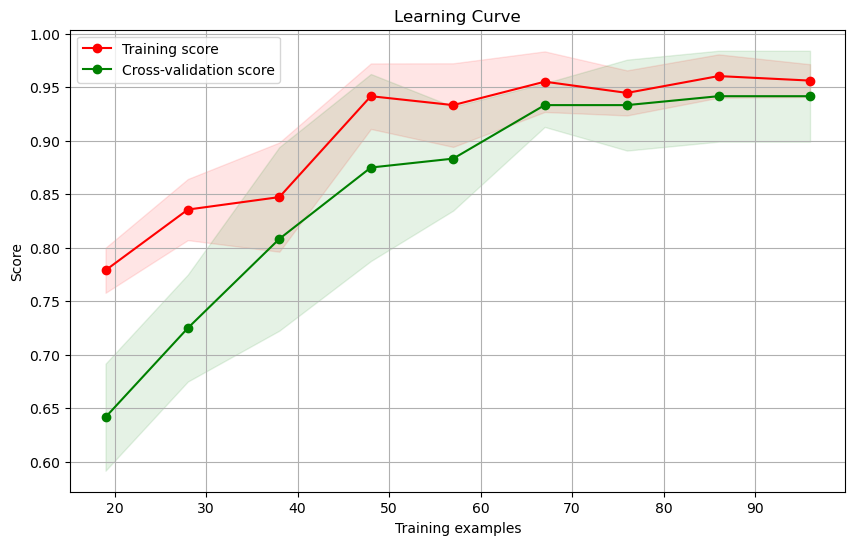

In [13]:
# learning curve berdasarkan GridSearchCV

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

Confusion Matrix :
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]



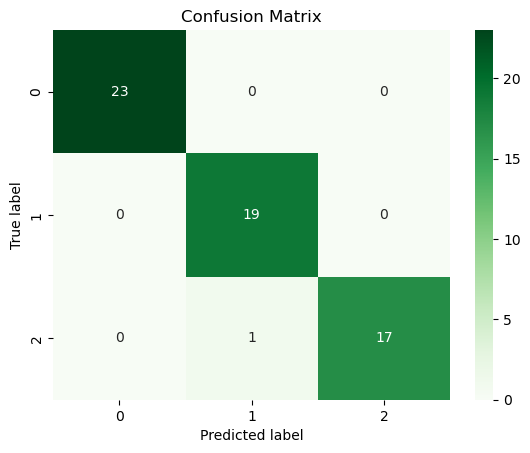

In [7]:
## confusion matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix :\n {matrix}\n')

import seaborn as sns  
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', cbar=True)  
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
